Final Parameters:
Mean 1: 2.9887173328824854
Std 1: 0.9466809628285212
Mean 2: 8.004258401935402
Std 2: 2.0466166030241064
Mixing Coefficient: 0.39077823756397556


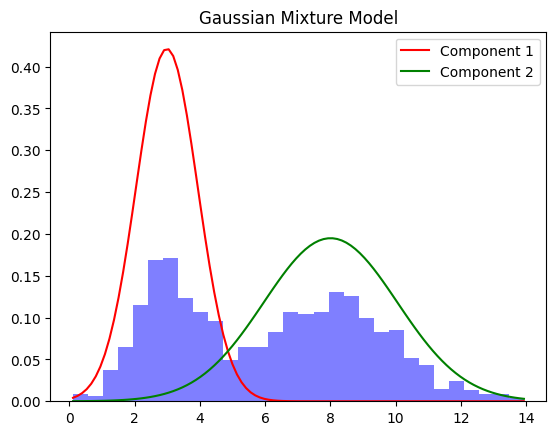

In [ ]:
#6. Write a program to demonstrate the working of  EM algorithm.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_data(num_samples, mean1, std1, mean2, std2, mixing_coefficient):
    np.random.seed(42)
    data = []
    for _ in range(num_samples):
        if np.random.rand() < mixing_coefficient:
            data.append(np.random.normal(mean1, std1))
        else:
            data.append(np.random.normal(mean2, std2))
    return np.array(data)

def calculate_responsibilities(data, mean1, std1, mean2, std2, mixing_coefficient):
    pdf1 = norm.pdf(data, mean1, std1)
    pdf2 = norm.pdf(data, mean2, std2)
    weighted_pdf1 = mixing_coefficient * pdf1
    weighted_pdf2 = (1 - mixing_coefficient) * pdf2
    responsibilities = weighted_pdf1 / (weighted_pdf1 + weighted_pdf2)
    return responsibilities

def update_parameters(data, responsibilities):
    total_samples = len(data)
    mean1 = np.sum(responsibilities * data) / np.sum(responsibilities)
    mean2 = np.sum((1 - responsibilities) * data) / np.sum(1 - responsibilities)
    std1 = np.sqrt(np.sum(responsibilities * (data - mean1)**2) / np.sum(responsibilities))
    std2 = np.sqrt(np.sum((1 - responsibilities) * (data - mean2)**2) / np.sum(1 - responsibilities))
    mixing_coefficient = np.sum(responsibilities) / total_samples
    return mean1, std1, mean2, std2, mixing_coefficient

def em_algorithm(data, initial_params, num_iterations):
    mean1, std1, mean2, std2, mixing_coefficient = initial_params
    for _ in range(num_iterations):
        responsibilities = calculate_responsibilities(data, mean1, std1, mean2, std2, mixing_coefficient)
        mean1, std1, mean2, std2, mixing_coefficient = update_parameters(data, responsibilities)
    return mean1, std1, mean2, std2, mixing_coefficient

def main():
    data = generate_data(num_samples=1000, mean1=3, std1=1, mean2=8, std2=2, mixing_coefficient=0.4)

    initial_params = (2, 1, 7, 1, 0.5)

    num_iterations = 100
    final_params = em_algorithm(data, initial_params, num_iterations)

    print("Final Parameters:")
    print("Mean 1:", final_params[0])
    print("Std 1:", final_params[1])
    print("Mean 2:", final_params[2])
    print("Std 2:", final_params[3])
    print("Mixing Coefficient:", final_params[4])

    plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')
    x_range = np.linspace(min(data), max(data), 100)
    plt.plot(x_range, norm.pdf(x_range, final_params[0], final_params[1]), label='Component 1', color='red')
    plt.plot(x_range, norm.pdf(x_range, final_params[2], final_params[3]), label='Component 2', color='green')
    plt.title('Gaussian Mixture Model')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
#7. Write a python program to implement Naive bayesian Classifier using any appropriate dataset.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


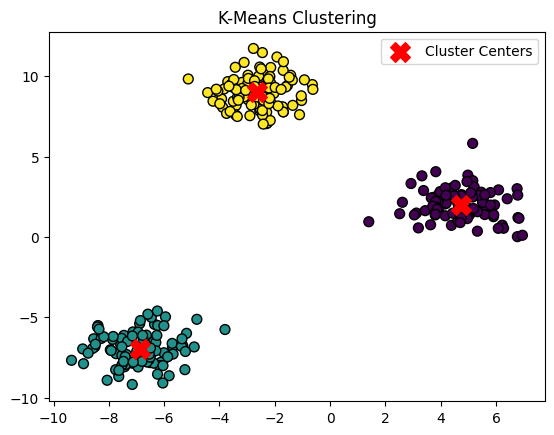

In [ ]:
#8. Write a program to implement K means Clustering, demonstrate the working by considering appropriate dataset.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
#9. Write a program to demonstrate the working of Apriori alogirthm.

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter'],
    ['milk', 'butter'],
    ['bread', 'milk', 'butter'],
    ['bread', 'milk'],
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support         itemsets
0      0.8          (bread)
1      0.6         (butter)
2      0.8           (milk)
3      0.4  (bread, butter)
4      0.6    (bread, milk)
5      0.4   (milk, butter)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0     (bread)      (milk)                 0.8                 0.8      0.6   
1      (milk)     (bread)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  0.9375     -0.04         0.8          -0.25  
1        0.75  0.9375     -0.04         0.8          -0.25  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


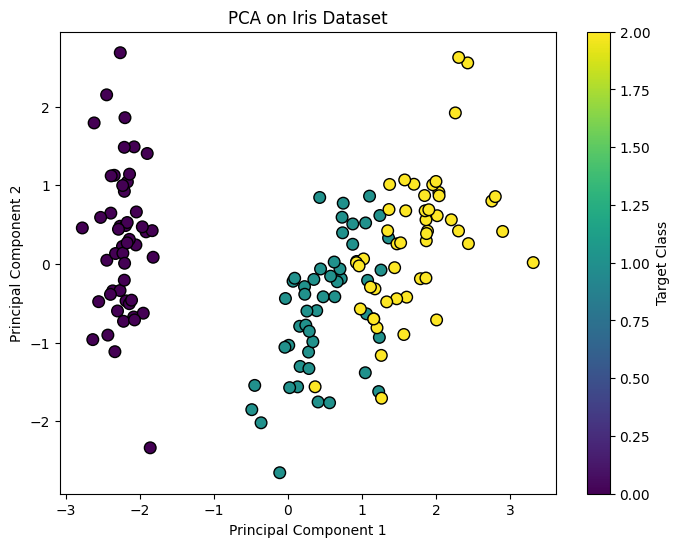

In [ ]:
#10. Write a program to implement PCA by using appropriate datasets for the computation.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_standardized)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.colorbar(scatter, label='Target Class')
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()